In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/HeartFailurePrediction/main/heart_failure_clinical_records_dataset.csv')
df=df.drop('time',axis=1)

In [ ]:
df.head(n=10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [ ]:
df.median()

age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
DEATH_EVENT                      0.0
dtype: float64

In [ ]:
df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
DEATH_EVENT                      0.321070
dtype: float64

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [ ]:
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype(str)
df['smoking'] = df['smoking'].astype(str)

In [ ]:
fig = go.Figure(
    data=go.Splom(
        dimensions=[
            dict(label='age', values=df.loc[df['DEATH_EVENT'] == '1']['age']),
            dict(label='creatinine_phosphokinase', values=df.loc[df['DEATH_EVENT'] == '1']['creatinine_phosphokinase']),
            dict(label='ejection_fraction', values=df.loc[df['DEATH_EVENT'] == '1']['ejection_fraction']),
            dict(label='platelets', values=df.loc[df['DEATH_EVENT'] == '1']['platelets']),
            dict(label='serum_creatinine', values=df.loc[df['DEATH_EVENT'] == '1']['serum_creatinine']),
            dict(label='serum_sodium',values=df.loc[df['DEATH_EVENT'] == '1']['serum_sodium'])
        ],
        showupperhalf=False, # remove plots on diagonal
        text=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'],
        marker=dict(
            color=df.loc[df['DEATH_EVENT'] == '1']['smoking'].astype('category').cat.codes,
            line_color='white', 
            line_width=0.5,
            colorscale='rdbu'
        )
    )
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Heart Failure Clinical Records',
    width=1350,
    height=1350
)
fig.show()

In [ ]:
fig = px.scatter_matrix(
    df.loc[df['smoking'] == 0],
    dimensions=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'],
    color=df.loc[df['smoking'] == 0]['DEATH_EVENT'].astype(str),
    labels = {'color': 'Death', 'smoking': 'Smoking'}
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Heart Failure Clinical Records',
    width=1350,
    height=1350,
)
fig.show()

In [ ]:
fig = px.scatter_matrix(
    df.loc[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)],
    dimensions=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'],
    color=df.loc[(df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)]['high_blood_pressure'].astype(str),
    labels = {'color': 'High Blood Pressure', 'smoking': 'Smoking'}
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Heart Failure Clinical Records',
    width=1350,
    height=1350,
)
fig.show()

In [ ]:
# Symbol for death event and color for age
fig = px.scatter_matrix(
    df.loc[df['DEATH_EVENT'] == '1'],
    dimensions=['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'],
    color='age',
    symbol=df.loc[df['DEATH_EVENT'] == '1']['high_blood_pressure'].astype(str),
    color_continuous_scale='Sunsetdark'
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Heart Failure Clinical Records',
    width=1350,
    height=1350,
)
fig.show()

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(
    np.round(df.drop(columns=['DEATH_EVENT']).corr().to_numpy(), decimals=3), 
    x=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
    y=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
    colorscale='Blues'
)
fig.show()

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [ ]:
px.box(df.loc[df['DEATH_EVENT'] == 1], x='DEATH_EVENT', y='age', color='sex')

In [ ]:
px.violin(df.loc[df['DEATH_EVENT'] == 1], x='DEATH_EVENT', y='creatinine_phosphokinase', color='diabetes')

In [ ]:
px.violin(df.loc[df['DEATH_EVENT'] == 1], x='DEATH_EVENT', y='creatinine_phosphokinase', color='diabetes')

In [ ]:
px.violin(df.loc[df['DEATH_EVENT'] == 1], x='DEATH_EVENT', y='serum_creatinine', color='high_blood_pressure')

In [ ]:
#data visualization using dist plot
import seaborn as sns
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.age, bins = 20, ax=ax[0,0])
sns.distplot(df.anaemia, bins = 20, ax=ax[0,1])
sns.distplot(df.creatinine_phosphokinase, bins = 20, ax=ax[1,0])
sns.distplot(df.diabetes, bins = 20, ax=ax[1,1])
sns.distplot(df.ejection_fraction, bins = 20, ax=ax[2,0])
sns.distplot(df.high_blood_pressure, bins = 20, ax=ax[2,1])
sns.distplot(df.platelets, bins = 20, ax=ax[3,0])
sns.distplot(df.serum_creatinine, bins = 20, ax=ax[3,1]) 
sns.distplot(df.serum_sodium, bins = 20, ax=ax[3,1]) 
sns.distplot(df.sex, bins = 20, ax=ax[3,1]) 
sns.distplot(df.smoking, bins = 20, ax=ax[3,1])

In [ ]:
x1=df[(df['smoking']==1)&(df['DEATH_EVENT']==1)]
x2=df[(df['smoking']==0)&(df['DEATH_EVENT']==1)]
#x3=df[(df['smoking']==1)&(df['DEATH_EVENT']==0)]
#x4=df[(df['smoking']==0)&(df['DEATH_EVENT']==0)]
#data = [['Smoking = 1 & Death = 1', x1['age'].count()], ['Smoking = 0 & Death = 1', x2['age'].count()], ['Smoking = 1 & Death = 0', x3['age'].count()],['Smoking = 0 & Death = 0', x4['age'].count()]]
data = [['Smoking = 1 & Death = 1', x1['age'].count()], ['Smoking = 0 & Death = 1', x2['age'].count()]]
SDCOR = pd.DataFrame(data, columns = ['Category', 'Count'])
SDCOR

,Category,Count
0,Smoking = 1 & Death = 1,30
1,Smoking = 0 & Death = 1,66


In [ ]:
px.pie(SDCOR,names='Category',values='Count',color=['0','1'])

In [ ]:
x1=df[(df['anaemia']==1)&(df['DEATH_EVENT']==1)]
x2=df[(df['anaemia']==0)&(df['DEATH_EVENT']==1)]
#x3=df[(df['smoking']==1)&(df['DEATH_EVENT']==0)]
#x4=df[(df['smoking']==0)&(df['DEATH_EVENT']==0)]
#data = [['Smoking = 1 & Death = 1', x1['age'].count()], ['Smoking = 0 & Death = 1', x2['age'].count()], ['Smoking = 1 & Death = 0', x3['age'].count()],['Smoking = 0 & Death = 0', x4['age'].count()]]
data = [['Anaemia = 1 & Death = 1', x1['age'].count()], ['Anaemia = 0 & Death = 1', x2['age'].count()]]
ADCOR = pd.DataFrame(data, columns = ['Category', 'Count'])
ADCOR

,Category,Count
0,Anaemia = 1 & Death = 1,46
1,Anaemia = 0 & Death = 1,50


In [ ]:
px.pie(ADCOR,names='Category',values='Count',color=['0','1'])

In [ ]:
x1=df[(df['high_blood_pressure']==1)&(df['DEATH_EVENT']==1)]
x2=df[(df['high_blood_pressure']==0)&(df['DEATH_EVENT']==1)]
#x3=df[(df['smoking']==1)&(df['DEATH_EVENT']==0)]
#x4=df[(df['smoking']==0)&(df['DEATH_EVENT']==0)]
#data = [['Smoking = 1 & Death = 1', x1['age'].count()], ['Smoking = 0 & Death = 1', x2['age'].count()], ['Smoking = 1 & Death = 0', x3['age'].count()],['Smoking = 0 & Death = 0', x4['age'].count()]]
data = [['high_blood_pressure = 1 & Death = 1', x1['age'].count()], ['high_blood_pressure = 0 & Death = 1', x2['age'].count()]]
HPDCOR = pd.DataFrame(data, columns = ['Category', 'Count'])
HPDCOR

,Category,Count
0,high_blood_pressure = 1 & Death = 1,39
1,high_blood_pressure = 0 & Death = 1,57


In [ ]:
px.pie(HPDCOR,names='Category',values='Count',color=['0','1'])

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


Data Preprocessing

In [ ]:
scaler=StandardScaler(with_mean=False)

sc_df=pd.DataFrame(
    scaler.fit_transform(
        X=df.drop(columns=['anaemia', 'DEATH_EVENT', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']), 
        y=df['DEATH_EVENT']
    ),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'],
    index=df.index
)

In [ ]:
sc_df['anaemia'] = df['anaemia']
sc_df['diabetes'] = df['diabetes']
sc_df['high_blood_pressure'] = df['high_blood_pressure']
sc_df['sex'] = df['sex']
sc_df['smoking'] = df['smoking']

In [ ]:
sc_df.head(n=10)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,6.315842,0.600828,1.692759,2.714036,1.839697,29.511299,0,0,1,1,0
1,4.631617,8.115301,3.216241,2.697220,1.065088,30.873359,0,0,0,1,0
2,5.473730,0.150723,1.692759,1.659147,1.258740,29.284289,0,0,0,1,1
3,4.210561,0.114591,1.692759,2.150746,1.839697,31.100369,1,0,0,1,0
4,5.473730,0.165176,1.692759,3.349018,2.614307,26.333159,1,1,0,0,0
5,7.579010,0.048520,3.385517,2.089296,2.033350,29.965319,1,0,1,1,1
6,6.315842,0.253958,1.269569,1.300689,1.161914,31.100369,1,0,0,1,0
7,5.052674,0.325190,5.078276,4.649708,1.065088,29.738309,1,1,0,1,1
8,5.473730,0.162079,5.501466,2.697220,1.452393,31.327379,0,0,0,0,0
9,6.736898,0.126979,2.962328,3.973759,9.101660,30.192329,1,0,1,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sc_df, df['DEATH_EVENT'], test_size=0.1, random_state=16)

In [ ]:
X_train.head(n=10)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
134,6.821109,4.686868,2.962328,2.365820,1.142549,31.100369,0,0,0,1,1
145,4.210561,0.190985,2.539138,2.724278,0.677783,32.008409,0,0,0,1,1
63,3.789505,0.600828,2.962328,3.943034,0.968262,32.916449,0,0,0,1,0
292,4.378984,0.196146,3.216241,3.912309,0.968262,31.781399,0,1,0,1,1
284,4.210561,0.055747,3.385517,2.857419,0.774609,32.008409,1,0,0,1,0
222,3.536871,0.088782,2.962328,3.738201,1.065088,31.554389,1,0,0,1,1
289,7.579010,0.347902,3.216241,3.994242,0.871436,32.689439,1,0,0,0,0
111,4.631617,0.061941,2.962328,2.335095,1.161914,30.646349,0,0,0,1,1
20,5.473730,0.053682,2.115948,2.826695,1.258740,31.100369,1,0,1,0,0
46,4.294772,1.424643,2.115948,2.775486,0.871436,29.511299,0,0,1,1,0


Decision Tree Classification

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
print(r2_score(y_test, dtree.predict(X_test)))

0.6590909090909091


In [ ]:
for i in range(50):  
  X_train, X_test, y_train, y_test = train_test_split(sc_df, df['DEATH_EVENT'], test_size=0.1, random_state=i)
  print('For random state in training set = ', i)
  for j in range(1, 20):
    dtree = DecisionTreeClassifier(max_depth=j, random_state=0)
    dtree.fit(X_train, y_train)
    y1 = dtree.predict(X_test)
    if r2_score(y_test, y1) > 0:
      print('For depth = ', j, ', R squared via prediction on test set: ', r2_score(y_test, y1))

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
r1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
y1.shape

(60,)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on training set:  0.4311306135592268
R squared via prediction on training set:  0.1555750878955301
RMSE via prediction on test set:  0.2581988897471611
R squared via prediction on test set:  0.6590909090909091


<BarContainer object of 30 artists>

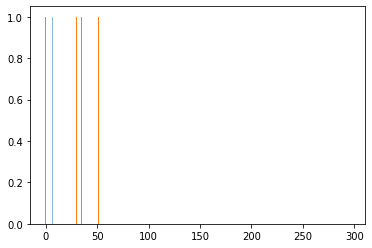

In [ ]:
plt.bar(y_test.index, y_test, alpha=0.5)
plt.bar(y_test.index, y1, alpha=1)

0.9333333333333333

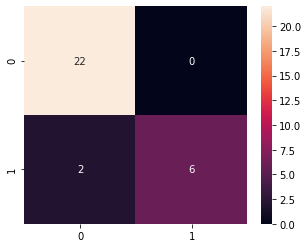

In [ ]:
from sklearn.metrics import confusion_matrix  
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y1))
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
score = accuracy_score(y_test, y1)
score

In [ ]:
average_precision = average_precision_score(y_test, y1)
average_precision

0.8166666666666667

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

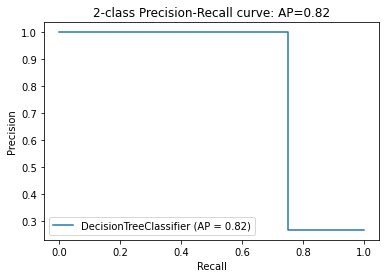

In [ ]:
disp = plot_precision_recall_curve(dtree, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
from sklearn import tree
from graphviz import Source
from IPython.display import display, SVG
from ipywidgets import interactive

In [ ]:
def plot_tree(depth):
  dtree = DecisionTreeClassifier(
    random_state=0, 
    max_depth=depth
  )

  dtree.fit(X_train, y_train)

  graph=Source(tree.export_graphviz(
      dtree,
      out_file=None, 
      feature_names=X_test.columns,
      filled=True
    )
  )

  display(SVG(graph.pipe(format='svg')))

  return dtree

In [ ]:
inter=interactive(
    plot_tree,
    depth=[3, 4, 5, 6, 7, 8]
)

display(inter)

interactive(children=(Dropdown(description='depth', options=(3, 4, 5, 6, 7, 8), value=3), Output()), _dom_clas…

Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=7, max_depth=4, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
tr1 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

<BarContainer object of 30 artists>

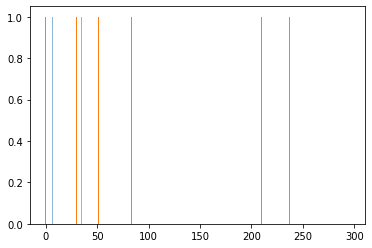

In [ ]:
plt.bar(y_test.index, y_test,alpha=0.5)
plt.bar(y_test.index, y2,alpha=1)

0.8

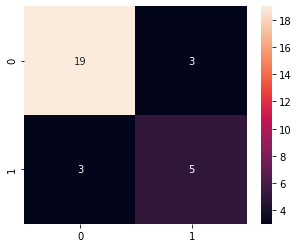

In [ ]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y2)
import seaborn as sn
cm = pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
score = accuracy_score(y_test, y2)
score

In [ ]:
average_precision = average_precision_score(y_test, y2)
average_precision

0.490625

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.49')

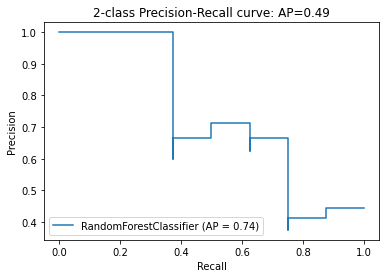

In [ ]:
disp = plot_precision_recall_curve(model_rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

<BarContainer object of 30 artists>

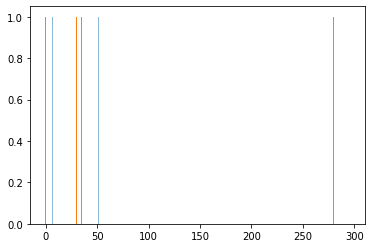

In [ ]:
plt.bar(y_test.index, y_test,alpha=0.5)
plt.bar(y_test.index, y_pred,alpha=1)

0.8333333333333334

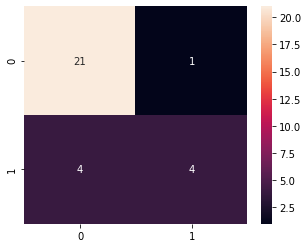

In [ ]:
 from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
cm
df = pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sn.heatmap(df,annot=True)
score = accuracy_score(y_test,y_pred)
score

In [ ]:
average_precision = average_precision_score(y_test,y_pred)
average_precision

0.5333333333333333

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.53')

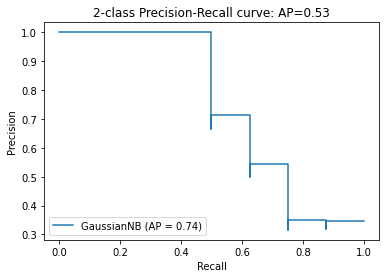

In [ ]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Logistic Classiication

In [ ]:
LR= LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
tr1 = LR.predict(X_train)
yLR = LR.predict(X_test)

<BarContainer object of 30 artists>

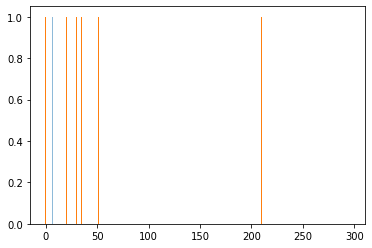

In [ ]:
plt.bar(y_test.index, y_test,alpha=0.5)
plt.bar(y_test.index, yLR,alpha=1)

0.8666666666666667

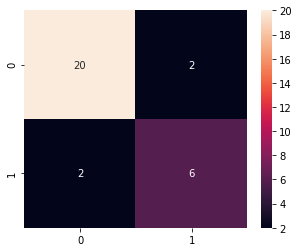

In [ ]:
 from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, yLR)
cm
df = pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sn.heatmap(df,annot=True)
score = accuracy_score(y_test,yLR)
score

In [ ]:
average_precision = average_precision_score(y_test,yLR)
average_precision

0.6291666666666667

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.63')

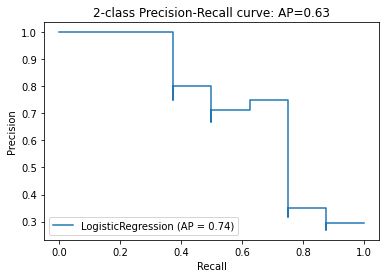

In [ ]:
disp = plot_precision_recall_curve(LR, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Comparing
